In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [2]:
image = mx.image.imread('image.jpg')

In [3]:
image.shape

(959, 640, 3)

In [4]:
image.dtype

numpy.uint8

In [5]:
print(image.min().asscalar(), image.max().asscalar())

0 255


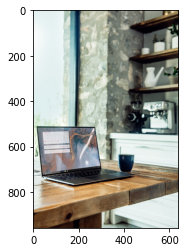

In [6]:
plt.imshow(image.asnumpy())

In [7]:
image = gcv.data.transforms.presets.imagenet.transform_eval(image)

In [8]:
network = gcv.model_zoo.get_model('ResNet50_v1d', pretrained=True)

In [9]:
prediction = network(image)

In [10]:
prediction.shape

(1, 1000)

In [11]:
probability = mx.nd.softmax(prediction)

In [12]:
probability = probability[0]

In [13]:
topk_indices = mx.nd.topk(probability, k = 5)

In [14]:
labels = []
for x in range(len(topk_indices)):
    class_index = topk_indices[x].astype('int').asscalar()
    class_label = network.classes[class_index]
    labels.append(class_label)

In [15]:
labels

['laptop', 'notebook', 'desk', 'pot', 'mouse']